Abdul Raheman (MSCS-634-B01) Lab 2

In [2]:
from sklearn.datasets import load_wine
import pandas as pd

# Load the Wine Dataset
wine = load_wine()
X = wine.data
y = wine.target

# Basic data exploration
print("Feature names:", wine.feature_names)
print("Class distribution:", pd.Series(y).value_counts().to_dict())
print("Data description:", wine.DESCR)

Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Class distribution: {1: 71, 0: 59, 2: 48}
Data description: .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ===

In [3]:
from sklearn.model_selection import train_test_split

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (142, 13)
Testing set size: (36, 13)


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# KNN parameters
ks = [1, 5, 11, 15, 21]
accuracies_knn = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies_knn.append(acc)

# Record accuracies
print("KNN accuracies for k values [1, 5, 11, 15, 21]:", accuracies_knn)

KNN accuracies for k values [1, 5, 11, 15, 21]: [0.7777777777777778, 0.7222222222222222, 0.75, 0.75, 0.7777777777777778]


In [5]:
from sklearn.neighbors import RadiusNeighborsClassifier

# RNN parameters
radii = [350, 400, 450, 500, 550, 600]
accuracies_rnn = []

for r in radii:
    rnn = RadiusNeighborsClassifier(radius=r)
    rnn.fit(X_train, y_train)
    y_pred = rnn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies_rnn.append(acc)

# Record accuracies
print("RNN accuracies for radius values [350, 400, 450, 500, 550, 600]:", accuracies_rnn)

RNN accuracies for radius values [350, 400, 450, 500, 550, 600]: [0.75, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222]


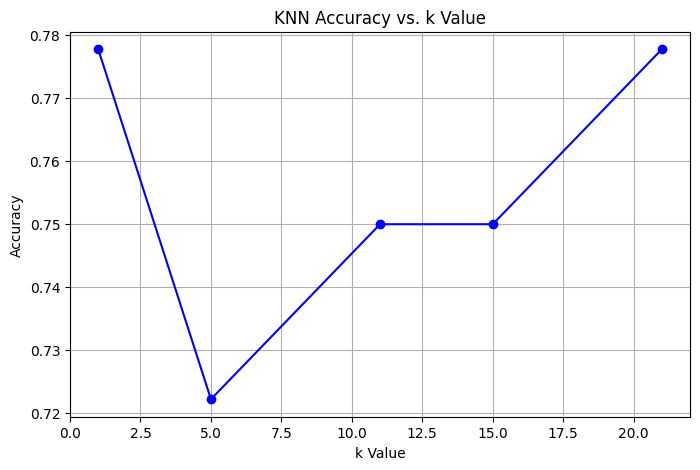

In [6]:
import matplotlib.pyplot as plt

# Plot KNN accuracy trend
plt.figure(figsize=(8, 5))
plt.plot(ks, accuracies_knn, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

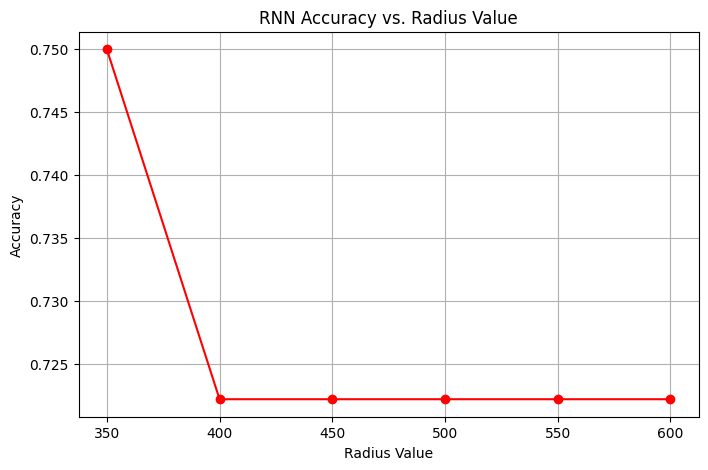

In [7]:
# Plot RNN accuracy trend
plt.figure(figsize=(8, 5))
plt.plot(radii, accuracies_rnn, marker='o', linestyle='-', color='r')
plt.title('RNN Accuracy vs. Radius Value')
plt.xlabel('Radius Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

KNN almost always performs better in this dataset than RNN does, with a peak accuracy of approximately 77.8% compared to 75% for RNN.   Although RNN is more stable, it is not as good with these radii. On the other hand, KNN appears to be more affected by variation in the parameters.



  For instance, if you have data that is well-balanced and has a low level of noise, you can use KNN to obtain more accurate results while still retaining some degree of flexibility with regard to the number of neighbors.   Recurrent neural networks (RNN) are superior to KNN in situations where there is a lack of data or when the data is distributed unevenly. This is because RNN does not rely excessively on dense areas, whereas KNN results could be influenced by outliers.